In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np
from keras.datasets import mnist

#python magic function
%matplotlib inline

In [6]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [8]:
print('Training Data: {}'.format(x_train.shape))
print('Training Label {}'.format(y_train.shape))
print('Test Data {}'.format(x_test.shape))
print('Test Labels {}'.format(y_test.shape))

Training Data: (60000, 28, 28)
Training Label (60000,)
Test Data (10000, 28, 28)
Test Labels (10000,)


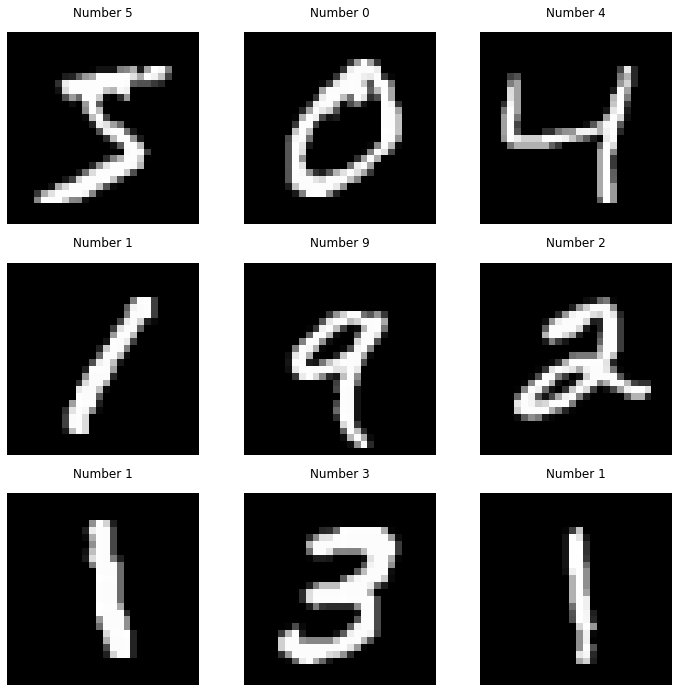

In [14]:
#Create a figue with 3x3 subplot

fig, axs = plt.subplots(3,3,figsize = (12,12))
plt.gray()

#Show the mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))

In [19]:
#Preprocessing the images

X = x_train.reshape(len(x_train), -1)
Y = y_train

#Normalize the data to 0-1

X = X.astype(float)/255.
print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [21]:
from sklearn.cluster import MiniBatchKMeans
n_digits = len(np.unique(y_test))
print(n_digits)

kmeans = MiniBatchKMeans(n_clusters=n_digits)

kmeans.fit(X)

10


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [38]:
def infer_cluser_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        #find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)
        
        #append actual labels  for each point  in clusters
        labels.append(actual_labels[index])
        
        #determine the most common label
        if len(labels[0])==1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        
        #assign the cluster to the value in infered label dictionary
        if np.argmax(counts) in inferred_labels:
            #append the new number to the existing  array at this key
            inferred_labels[np.argmax(counts)].append(i)
        else:
            #create a new array for the key
            inferred_labels[np.argmax(counts)] = [i]
    return inferred_labels
def infer_data_labels(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
    return predicted_labels

In [40]:
cluster_labels = infer_cluser_labels(kmeans,Y)
X_cluster = kmeans.predict(X)
predicted_labels = infer_data_labels(X_cluster, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[8 0 4 1 4 2 1 8 1 9 3 2 3 6 1 9 2 2 6 9]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [45]:
from sklearn import metrics

def calculate_matrics(estimator, data, labels):
    #calculate and print metrics
    print('Number of Cluster: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [47]:
clusters = [10,16,36,64,144,156]
#Test different number of clusters
for n_cluster in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_cluster)
    estimator.fit(X)
    
    calculate_matrics(estimator,X,Y)
    
    #Determine predict labels
    cluster_labels = infer_cluser_labels(estimator,Y)
    predict_Y = infer_data_labels(estimator.labels_,cluster_labels)
    
    #Calculate and print accuracy
    print('Accuracy {}\n'.format(metrics.accuracy_score(Y,predict_Y)))

Number of Cluster: 10
Inertia: 2432695.6906440663
Homogeneity 0.4397026585923451
Accuracy 0.5465666666666666

Number of Cluster: 16
Inertia: 2209719.6295072525
Homogeneity 0.5698431806337222
Accuracy 0.6484666666666666

Number of Cluster: 36
Inertia: 1954050.4011850432
Homogeneity 0.6848133676061039
Accuracy 0.76485

Number of Cluster: 64
Inertia: 1812963.428933221
Homogeneity 0.7348389932172107
Accuracy 0.7954833333333333

Number of Cluster: 144
Inertia: 1631577.287601449
Homogeneity 0.8060524293017988
Accuracy 0.8697333333333334

Number of Cluster: 156
Inertia: 1616499.5023812833
Homogeneity 0.8118704184559722
Accuracy 0.8754



In [56]:
#Test kmeans algorithm on testing dataset
x_test = x_test.reshape(len(x_test),-1)
#Cover each image to 1 dimention
x_test = x_test.astype(float)/255.

#initialze and fit kmeans algorithm on traning data
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluser_labels(kmeans,Y)

#Predict label for testing data
test_cluster = kmeans.predict(x_test)
predict_labels = infer_data_labels(test_cluster, cluster_labels)

#Calculate and print accuracy
print('Testing accuracy: {}'.format(metrics.accuracy_score(y_test, predict_labels)))

Testing accuracy: 0.1032


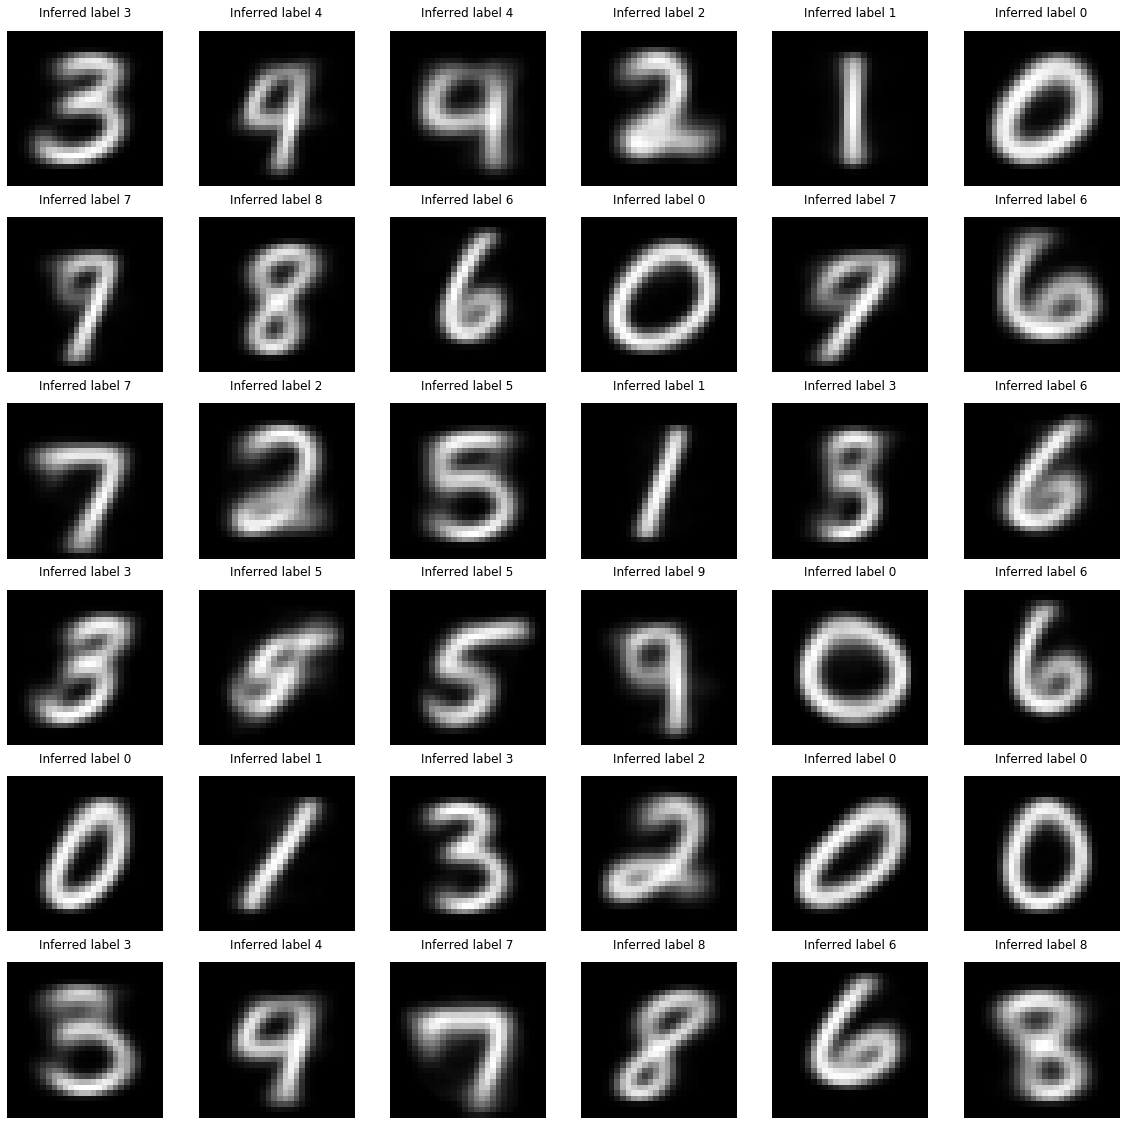

In [63]:
#Visul the cluster sentroid

#Initialize and fit KMeans algorithms
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

#record centroid value
centroid = kmeans.cluster_centers_

#reshape centroid into images
images = centroid.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

#Determine the cluster label
cluster_labels = infer_cluser_labels(kmeans,Y)

#create figure
fig, axs = plt.subplots(6,6, figsize=(20,20))
plt.gray()

for i, ex in enumerate(axs.flat):
    for key, value in cluster_labels.items():
        if i in value:
            ex.set_title('Inferred label {}'.format(key))
    ex.matshow(images[i])
    ex.axis('off')
#fig.show()